In [1]:
import numpy as np
from scipy.io import loadmat,savemat
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm 

import numpy as np



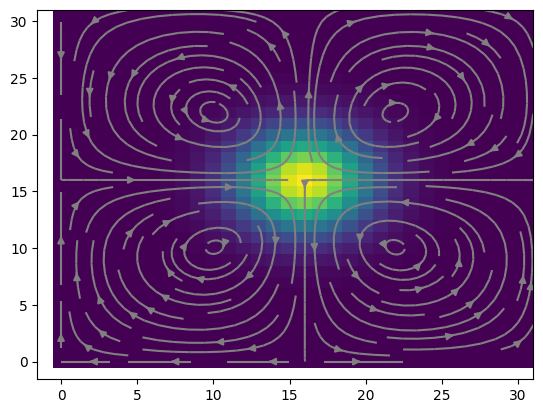

In [2]:
 
# Calculate the velocity field due to a collection of Stokeslets
# using the Fourier projection method

Nx = 32 
Ny = 32   # number of grid points.
Np = 1     # number particles.i

#==============================================================
# realspace grid
xx = np.arange(0, Nx)
yy = np.arange(0, Ny)
x, y = np.meshgrid(xx, yy)

# forcegrid in real space (memory  allocate)
fx = np.zeros((Nx, Ny))
fy = np.zeros((Nx, Ny))

# Fourier grid.
kx =np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
ky =np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
kx, ky = np.meshgrid(kx, ky) # nargout=2

# Particles position
r = [Nx/2, Ny/2]


# Mollified Force Strength
sigma = 3
scale = ( 2 * np.pi * sigma**2 )**(- 2/2)

# Particle or mollified force loop
for i in range(Np):
    arg = ( (x - r[i])**2 + (y - r[Np+i])**2 ) / (2 * sigma**2)
    fx =  np.exp(-arg) * scale
    fy =  np.exp(-arg) * scale

#fx = np.zeros((Nx, Ny))
#fy = np.zeros((Nx, Ny))
#fx = (px*px)*np.exp(-arg) * scale
#fy = (py*py)*np.exp(-arg) * scale

# Fourier of force
Fxk = np.fft.fft2(fx)
Fyk = np.fft.fft2(fy)

# Higher orders Molified forces
p = [0, 1]

for i in range(Np):
    pdotk = p[i]*kx + p[i+Np]*ky

    Fxk = -1j*Fxk*(pdotk*p[i]   )# - kx/3) # without Kx/3 also giving same result
    Fyk = -1j*Fyk*(pdotk*p[i+Np])# - ky/3)


ksq = kx*kx + ky*ky
ksq[0, 0] = 1     # float seems to be not working

Fdotk = Fxk*kx + Fyk*ky

# construct the perpendicular component of the force in Fourier space
# and equate it to the velocity


vxk = np.zeros((Nx, Ny))
vyk = np.zeros((Nx, Ny))

vxk = (Fxk - Fdotk*((kx / ksq))) / ksq
vyk = (Fyk - Fdotk*((ky / ksq))) / ksq

vxk[0, 0] = 0
vyk[0, 0] = 0

vx = np.real(np.fft.ifft2(vxk))
vy = np.real(np.fft.ifft2(vyk))


# For Plotting
plt.figure()
#plt.quiver(x, y, vx,vy)
plt.streamplot(x, y, vx, vy,color =[0.5,0.5,0.5])
plt.axis('equal')
plt.axis('tight')

plt.pcolor(x, y, fy)
plt.show()


In [3]:
## a chain of particles

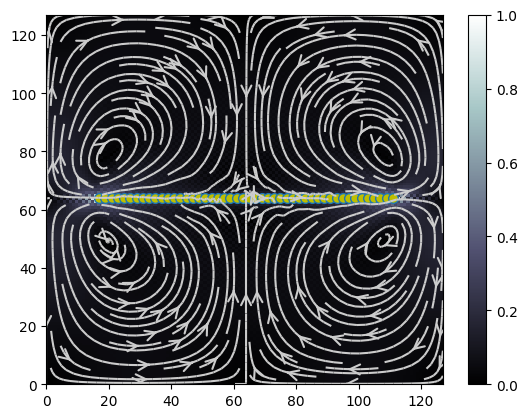

In [4]:
a = 1
sigma = a/3

Nx = 128 
Ny = 128   # number of grid points.
Np = 48    # number particles.

xx = np.arange(0, Nx) 
yy = np.arange(0, Ny) 
x, y = np.meshgrid(xx, yy) 
r = np.zeros(2*Np)
p = np.zeros(2*Np)
fx = np.zeros((Nx, Ny))
fy = np.zeros((Nx, Ny))
Fxk = np.zeros((Nx, Ny), dtype=np.complex128)
Fyk = np.zeros((Nx, Ny), dtype=np.complex128)

# Fourier grid.
kx = 2 * np.pi / Nx * np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
ky = 2 * np.pi / Ny * np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
kx, ky = np.meshgrid(kx, ky) 


#radius = 30
#theta = np.linspace(0,np.pi,Np)
#r[:Np] = Nx/2 + radius * np.cos(theta)
#r[Np:] = Ny/4 + radius * np.sin(theta)
##for i in range(Np):

# Linear configuration
#
for i in range(Np):
    r[i ] = Nx/2 - (Np-1)*1 + 2*i
    r[i + Np] = Ny/2
    p[i] = 1
    p[i + Np] = 0   
#
#    apy = Np/2
#    nb =  180/(Np-1)
#    r[i]    = Nx/2 - 2*apx*np.cos( i*nb*np.pi/180)
#    r[i+Np] = Ny/4 + 2*apy*np.sin( i*nb*np.pi/180) 
#
#    apy = 10 
#    nb =  2*180/(Np-1)  
#    r[i] = Nx/2 - (Np-1)*1 + 2*i
#    r[i+Np] = Ny/2 + apy*np.sin( i*nb*np.pi/180)

#for i in range(Np):
#    if i == Np-1:
#        p[i]    = r[i]    - r[i-1]  
#        p[i+Np] = r[i+Np] - r[i+Np-1] 
#    else:
#        p[i] = r[i+1] - r[i]
#        p[i+Np]= r[i+Np+1] -r[i+Np]
#    modp = np.sqrt( p[i]*p[i] + p[i+Np]*p[i+Np])
#    p[i]   = p[i]   /modp
#    p[i+Np]= p[i+Np]/modp

scale = ( 2 * np.pi * sigma**2 )**(- 2/2)

arg = ( (x - Nx/2)**2 + (y - Ny/2)**2 ) / (2 * sigma**2)
fx0 =  np.exp(-arg) * scale
Fk0 = np.fft.fft2(fx0)

ksq = kx*kx + ky*ky
ksq[0, 0] = 1.0
a2 = a*a*4.0/15.0
# calculations in Fourier space
for i in range(Np):
    kdotr = kx*(r[i] - Nx/2) + ky*(r[i + Np] -Ny/2) 
    pdotk = p[i]*kx + p[i+Np]*ky
    k2 = kx*kx + ky*ky
    Fxk += -1j*Fk0* np.exp(-1j * kdotr)*( p[i]     *pdotk - kx/3 )*(1-a2*k2)
    Fyk += -1j*Fk0* np.exp(-1j * kdotr)*( p[i + Np]*pdotk - ky/3 )*(1-a2*k2)

Fdotk = Fxk*kx + Fyk*ky

vxk = ( Fxk - Fdotk*(kx / ksq) ) / ksq
vyk = ( Fyk - Fdotk*(ky / ksq) ) / ksq

vxk[0, 0] = 0
vyk[0, 0] = 0

vx = np.real(np.fft.ifft2(vxk))
vy = np.real(np.fft.ifft2(vyk))






#savemat('flowNp=%s.mat'%(Np), {'x':x, 'y':y,'vx':vx,'vy':vy})
### plotting business
plt.figure()
px = p[0:Np]
py = p[Np:2*Np]
rx = r[0:Np]
ry = r[Np:2*Np]
vmag = np.sqrt(vx*vx + vy*vy)
vmax = np.max(vmag)+ 0.035
plt.pcolor(x, y, vmag/vmax, cmap=cm.bone)
plt.clim(0, 1)
plt.colorbar()
plt.plot(rx, ry, 'o', markerfacecolor='y', markersize=7) 
plt.streamplot(x, y, vx, vy, density=1.5, color=[0.8, 0.8, 0.8], arrowstyle='->', arrowsize =1.8)
#plt.quiver(rx, ry, px,py, angles='xy', scale_units='xy')
#plt.axes([0.0, 127.0, 0.0, 127.0])
plt.xlim([0, Nx-1])
plt.ylim([0, Ny-1])
#plt.savefig('a', bbox_inches='tight')        
#plt.savefig('fig1b_FMIMA.png', format='png', dpi=1000)
plt.show()
